# リョウコと実装！シュレディンガーの猫

みなさん、「リョウコと実装！シュレディンガーの猫」へようこそ。本ガイドは量子コンピューター初心者向けのプログラミングガイドです。量子コンピューターと量子コンピューティングについて簡単に説明した後、シュレディンガーの猫の実装に挑戦していただきます。

**前提知識**：Python

**事前準備**：
* Jupyter notebookの実行環境構築
* [IBM Quantum](https://quantum.ibm.com/) へのサインアップ

### 目次
1. [量子コンピューター](#quantum_computer)
1. [量子プログラミング](#quantum_programming) 
1. [環境準備](#prep)
1. [量子回路を作成する](#circuit)
1. [量子ゲートを作用させる](#gate)
1. [シミュレーターで実行する](#simulator)
1. [実機で実行する](#real_machine)
1. [演習！](#exercise)
1. [まとめ](#summary)

## 1. 量子コンピューター <a id='quantum_computer'></a>


### 1.1 量子って何？
Q. 物質の最小構成単位は何でしょうか？

例えば、鉄の塊をどんどん細かく切ったとき、最後に見えるモノはなんでしょう？

![物質の最小構成単位](material.png)

|　　　| 鉄 | 原子 | 原子核 | 陽子 | クォーク |
| --- | ---: | ---: | ---: | ---: | ---: |
| 大きさ | $$ \sim10^{-1}m $$ | $$ \sim10^{-9}m $$ | $$ \sim10^{-14}m $$ | $$ \sim10^{-15}m $$ | $$ \sim10^{-18}m $$ |

図のように、鉄は原子でできていて、原子は原子核と電子から、原子核は陽子と中性子から、陽子と中性子はクォークからできています。一般的に原子より小さいものを**量子**と呼びます。

### 1.2 量子の不思議なふるまい

Q. 光は波でしょうか、粒子でしょうか？

#### ヤングの実験

![ヤングの実験](wave.png)

Sourceは光源、S1には一つのスリット、S2は2つのスリット、Fはスクリーンです。Sourceから出た光は、S1、S2のスリットを通りスクリーンに到達します。このとき スクリーン上に明暗の干渉縞が現れます。干渉縞が現れることは、光が**波**であれば説明できると、この実験をしたヤングは結論づけました。

#### 光電効果

![光電効果](photoelectric.png)

光電効果は、金属に光を当てると電子が飛び出す現象です。コピー機やデジタルカメラなどで利用されています。電子が飛び出るには、ある波長(金属の種類により異なります)より短い光を当てる必要があります。その波長より長い光の場合、どんなに強い光を当てても電子はでません。この現象は光が波だと説明することができないのです。光が**粒子**であれば説明できると言ったのがアインシュタインです。アインシュタインはこの業績でノーベル賞を受賞しました。

ヤングの実験と光電効果の意味するところ、それは光は粒子と波の両方の性質を持つということです。光も量子の一つです。**量子は粒子と波の両方の性質を持つ**のです。ヤングの実験でSourceを電子銃に置き換えて電子で実施すると、光と同じように干渉縞を観測できます。粒子のように考えられる電子も波の性質を持つのです。

このように、量子の世界は、私たちの世界と全く異なり、直感的に理解できません。量子の世界を記述する学問を量子力学と言います。高名な理論物理学者のファインマンも「もしも量子力学を理解できたと思ったならば...それは量子力学を理解できていない証拠だ」と言っています。

### 1.3. 量子コンピューター
量子コンピューターとは、そんな量子の不思議な振る舞いを利用して計算するコンピューターを指します。量子コンピューターで利用される量子の振る舞いは主に以下の3つです。
- 重ね合わせ 
- 干渉
- 量子もつれ (エンタングルメント)

量子コンピューターは強力だと言われる理由は、これらの現象を利用しているからです。例えば、量子の重ね合わせができる振る舞いは、量子ビットの表現力を飛躍的に強化します。一般的なコンピューター(古典コンピューター)のビットは、0か1のどちらかを入れることができます。対して、量子ビットは$ |0\rangle $ (古典コンピューターの0に相当)と$ |1\rangle $ (古典コンピューターの1に相当)を重ね合わせて入れることができます。つまり、$ |0\rangle $と$ |1\rangle $を同時に両方入れられるのです。3ビットあれば、古典コンピューターも8通りの数を表現できますが、同時に格納できる数は一つです。対して3量子ビットあると8通りの数を同時に格納できるのです。

ただし、観測すると量子ビットも0か1のどちらかの状態が確定します。その結果は確率的です。単純な計算のみでは、意味のある結果を得ることはできません。干渉や量子もつれを利用した効果的な量子アルゴリズムが必要なのです。

![BitAndQubit6](BitQubit.png)

| ビット数 | 表現できる数 |
| --- | --- | 
| 1ビット| 2通り |
| 2ビット| 4通り |
| 8ビット| 256通り |
| 16ビット| 65536通り |
| 32ビット| 約43億通り |
| 64ビット| 約1.8×1019通り |


## 2. 量子プログラミング <a id='quantum_programming'></a>
### 2.1 量子プログラミングの流れ

1. **量子ビットの初期化**：多くの量子コンピューターにおいて、量子ビットは$ |0\rangle $に初期化されます。
1. **量子ビットの操作**：量子ビットの操作は`量子ゲート`と呼ばれるもので実施します。量子ゲートによる操作で、量子ビットの状態は重ね合わせ状態となり、結果は確率的なものとなります。
1. **量子ビットの測定**：`測定ゲート`を用いて量子ビットを測定し、結果を古典ビットに格納します。結果は確率的なもののため、1回の測定で答えを得られることはありません。通常複数回、回路を実行し測定することを繰り返します。


### 2.2 量子プログラムの可視化

量子プログラムは**量子回路**として可視化できます。量子回路では下図のようにワイヤー上にボックスが配置されます。一本一本のワイヤーが量子ビット、ボックスがゲートを意味します。時間は左から右に流れますので、左のゲートから順に実行されることを意味します。古典ビットは、最下部に二重線でまとめて表現されます。

![量子回路](Circuit.png)



### 2.3 Qiskit
[Qiskit](https://www.ibm.com/quantum/qiskit)は量子プログラミングのためのオープンソースのフレームワークです。量子プログラム(=量子回路)を作成し、様々な量子デバイスやシミュレーター上で実行するためのツールを提供します。

## 3. 環境準備 <a id='prep'></a>
このガイドのプログラムを実行する環境を準備しましょう。

1. Qiskitをご自身のPCに[インストール](https://docs.quantum.ibm.com/guides/install-qiskit)します(参考：[日本語手順](https://qiita.com/kifumi/items/8f3617051635f986cc5f))。
2. Jupyter notebookのダウンロード <br/>
  ハンズオンで使用するJupyter notebookファイルを[こちら](https://github.com/purepureclub/RyokoFundamental/archive/refs/heads/main.zip)からダウンロードします
3. ダウンロードしたzipファイルを解凍します。
4. Jupyter notebookで「pamphlet.ipynb」を開いてください。  
5. [IBM Quantum](https://quantum.ibm.com/)へのログインします。 <br/>
6. 右上にある API トークンをクリックしてコピーします。
7.  以下のコードセルで、 `deleteThisAndPasteYourTokenHere` をあなたのトークンに置き換えて、実行します。セルをクリックして「shift」+「enter」を押してください。これは、Jupyter notebookのコードセルを実行する最も一般的な方法です。 


In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService


# APIトークンを設定します
token="YOUR_API_TOKEN"

# QiskitRuntimeServiceの取得
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

## 4. 量子回路を作成する <a id='circuit'></a>
では、量子回路を作成してみましょう。Qiskitで量子回路を表現するのは、`QuantumCircuit`クラスです。コンストラクタの種類はいくつかあります。最もポピュラーなのは、量子ビット数と古典ビット数を指定する方法です。作成した回路は、`draw`メソッドを使って簡単に描画することができます。

下のセルに書かれたコードを実行しましょう。

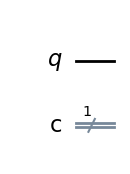

In [2]:
from qiskit import QuantumCircuit


# 1量子ビット、1古典ビットの回路を作成する
qc = QuantumCircuit(1, 1)
# 回路を描画する
qc.draw('mpl')

## 5. 量子ゲートを作用させる<a id='gate'></a>
量子ゲートは、量子回路の量子ビットに作用します。どの量子ビットに作用させるか、引数で指定します。

### 1量子ビットに作用するゲート
`Xゲート`は、$ |0\rangle $ を $ |1\rangle $ に、$ |1\rangle $ を $ |0\rangle $に反転させるゲートです。

`Hゲート`は、重ね合わせを作成するゲートです。$ |0\rangle $に作用させると 、50%の確率で$ |0\rangle $を、50%の確率で$ |1\rangle $ を観測する状態を作成します。

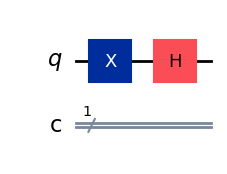

In [3]:
# 1量子ビット、1古典ビットの回路を作成する
qc = QuantumCircuit(1, 1)

# 第0量子ビットにXゲートを作用させる
qc.x(0)
# 第0量子ビットにHゲートを作用させる
qc.h(0)

# 回路を描画する
qc.draw('mpl')

### 2量子ビットに作用するゲート
今回は使用しませんが、2量子ビットに作用するゲートもあります。

`CXゲート` (Controlled Xゲート、CNOTゲート) は、制御ビットが1の時、ターゲット・ビットを反転させるゲートです。

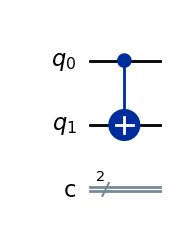

In [4]:
# 2量子ビット、2古典ビットの回路を作成する
qc = QuantumCircuit(2, 2)

# 第0量子ビットを制御ビット、第1量子ビットをターゲットビットとして、CXゲートを作用させる
qc.cx(0, 1)

# 回路を描画する
qc.draw('mpl')

### 測定ゲート
量子ビットの状態を測定するには、`measure`メソッドを使用します。以下は1量子ビットの量子回路をつくり、第0量子ビットにXゲートを作用させて、測定する量子回路です。

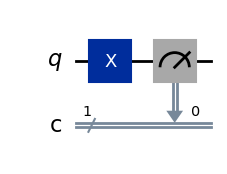

In [5]:
# 1量子ビット、1古典ビットの回路を作成する
qc = QuantumCircuit(1, 1)

# 第0量子ビットにHゲートを作用させる
qc.x(0)
# 第0量子ビットを測定し、第0古典ビットに格納する
qc.measure(0, 0)

#回路を描画する
qc.draw('mpl')

## 6. シミュレーターで実行する <a id='simulator'></a>
回路を作成したら、まずシミュレーターで実行し、期待される動作になっているか確認しましょう。Qiskitはデータを返す2つの方法を提供しています。本ガイドでは、測定したい量子ビット集合の確率分布を得る`Sampler`を使用します。また、Qiskitは複数のシミュレーターを提供していますが、本ガイドではもっとも基本的な`AerSimulator`を使用します。先ほど作成した回路を`AerSimulator`シミュレーターを用いてノイズのない理想的な環境で実行してみましょう。

回路を実行するには、まずバックエンドで実行可能な回路に変換(トランスパイルといいます)する必要があります。トランスパイルに必要なものがPass Managerです。`generate_preset_pass_manager`メソッドを使用して、バックエンドに応じたPass Managerを取得し、`run`メソッドで回路を変換します。変換した回路を`Sampler`の`run`メソッドで実行しましょう。`Sampler`の`run`メソッドの`shots`引数で実行回数を指定できます。

In [6]:
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


# AerSimulatorを取得します
backend = AerSimulator()

# 回路をトランスパイルし、バックエンドで実行可能な回路に変換します
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

#トランスパイルされた回路をSamplerで実行します
sampler = Sampler(mode=backend)
job = sampler.run([(isa_qc)], shots=16)
result = job.result()

`get_counts`メソッドを使って、結果をヒストグラムで表示させましょう。

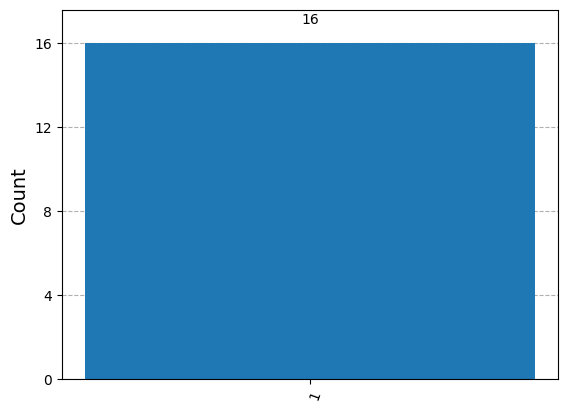

In [7]:
plot_histogram(result[0].data.c.get_counts())

get_bitstringsメソッドを使うと各回の実行結果が表示されます。

In [8]:
print(result[0].data.c.get_bitstrings())

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


## 7. 実機で実行する <a id='real_machine'></a>
では、実機で実行してみましょう。ご自身のアカウントにより、利用できるバックエンドが異なりますので、まず`QiskitRuntimeService`の`backends`メソッドでどのような実機が使えるか確認します。

In [9]:
# 使用できるバックエンドを表示します
service.backends()

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_torino')>,
 <IBMBackend('test_eagle_us-east')>]

最も待ち行列が少ないバックエンドを取得する`least_busy`メソッドで今回利用する実機を取得しましょう。

In [10]:
# 最も待ち行列が少ない実機を取得する
backend = service.least_busy(simulator=False, operational=True)
print(backend)

<IBMBackend('ibm_cusco')>


実機のバックエンドを使用して量子回路を実行する手順は、シミュレーターの時と一緒です。バックエンドを取得したら、回路をトランスパイルし、`Sampler`で実行します。

In [11]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_qc = pm.run(qc)

sampler = Sampler(mode=backend)
job = sampler.run([(isa_qc)], shots=16)
job_id = job.job_id()

実機で実行する場合は、待ち行列に入ったり実行に時間がかかったりして、いつ終わるかわかりません。ジョブのステータスを`status`メソッドで確認しましょう。

In [12]:
print(f"Job ID: {job_id}, Status: {job.status()}")

Job ID: cw870njbhxtg008wkje0, Status: QUEUED


`Status: DONE` と表示されたら、実行完了です。結果を取得して、表示してみましょう。実機はノイズがあるので、`0`が観測される可能性もあります。

In [13]:
result = job.result()
plot_histogram(result[0].data.c.get_counts())
print(result[0].data.c.get_bitstrings())

['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']


## 8. 演習：シュレディンガーの猫を実装する <a id='exercise'></a>

Q. シュレディンガーの猫をご存じですか？

シュレディンガーの猫とは、理論物理学者Erwin Schrödingerによる思考実験です。不透明な箱に、1分間に50%の確率で毒ガスを発生させる装置と猫を入れたとき、1分後の猫の生死がどうなっているかを論じるものです。
![シュレディンガーの猫](Cat.png)

ところで、$ |0\rangle $に`Hゲート`を作用させると 、50%の確率で$ |0\rangle $を、50%の確率で$ |1\rangle $を観測することができます。

これを利用し、量子ビットを使ってシュレディンガーの猫を実装してみましょう。

### 準備1：必要なライブラリをインポートします

In [14]:
import numpy as np
import matplotlib.pyplot as plt

### 準備2：生きた猫と死んだ猫を表示する関数を実装します

In [15]:
#猫画像の初期化
live_cat = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0,0,0,1,1,0,0,0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
    [0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,0],
    [0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,1,1,1,0],
    [0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0],
    [0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,0,0,0,0,0,1,1,1,0,0,1,1,0],
    [0,1,1,1,1,1,1,1,1,0,0,1,1,1,0,1,1,0,1,0],
    [0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,1,1,0],
    [0,1,1,1,1,1,1,1,0,0,0,0,0,0,1,1,0,1,1,0],
    [0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,1,1,0],
    [0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,1,0],
    [0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
dead_cat = np.array(
    [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0],
    [0,1,1,1,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0],
    [0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0],
    [0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

#入力が1の場合は生きている猫、
#それ以外は死んでいる猫が表示される関数
def show_cat(memory):
    if memory[0] == '1':
        image = live_cat
    else:
        image = dead_cat

    fig, ax = plt.subplots()
    ax.imshow(image, cmap=plt.cm.gray)
    ax.axis("off")
    plt.show()

関数が正しく動作するか確かめます。

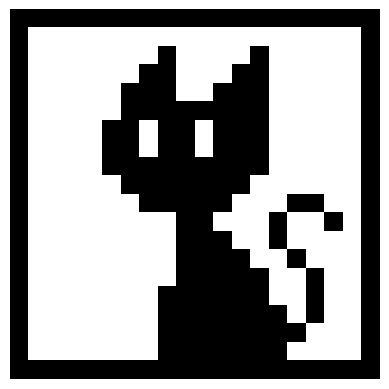

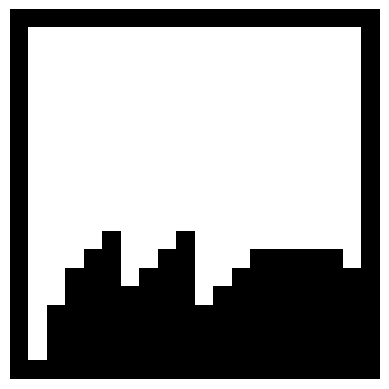

In [16]:
# 生きた猫
show_cat(['1'])

# 死んだ猫
show_cat(['0'])

### 演習1：50%の確率で|0⟩を、50%の確率で|1⟩を測定する量子回路を作成します

1量子ビット、1古典ビットを持つ量子回路を作成、第0量子ビットに`Hゲート`を作用させて、観測します。以下の不完全なコードセルにコードを追記して、実行してください。

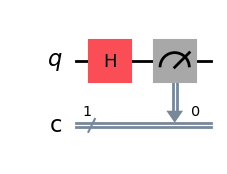

In [17]:
#1量子ビット、1古典ビットの量子回路の作成
circuit = QuantumCircuit(1, 1)

# 第0量子ビットにHゲートを作用させる
circuit.h(0)

# 量子回路を測定する
circuit.measure(0, 0)

# 量子回路を描画する
circuit.draw('mpl')

### 演習 2: 作成した量子回路が正しく動作するか確認します
AerSimulatorを用いて確かめてみましょう。50%の確率で$|0\rangle$が、50%の確率で$|1\rangle$が観測されることを確認します。

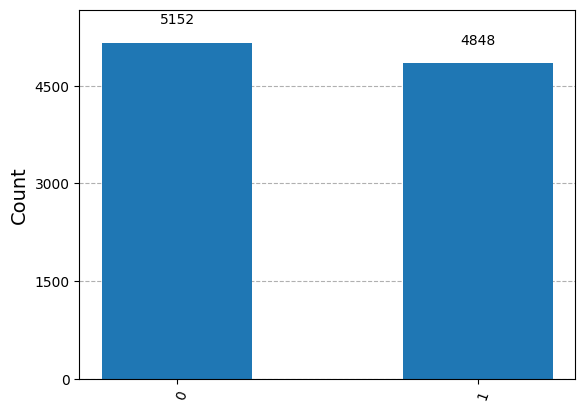

In [18]:
# AerSimulatorを取得します
backend_sim = AerSimulator()

# Pass Managerを取得し、トランスパイルします
pm_sim = generate_preset_pass_manager(backend=backend_sim, optimization_level=1)
isa_qc_sim = pm_sim.run(circuit)

# 回路をSamplerを用いて10000回シミュレーターで実行します
sampler_sim = Sampler(mode=backend_sim)
job_sim = sampler_sim.run([(isa_qc_sim)], shots=10000)

# jobから結果を取得します。
result_sim = job_sim.result()

# 実行結果をカウント数として取得します
counts_sim = result_sim[0].data.c.get_counts()

# 結果を描画します
plot_histogram(counts_sim)

### 演習 3: シミュレーターを使って実行する
シミュレーターの実行結果を用いて、猫の状態を決定しましょう。何度か実行して、生きている猫と死んでいる猫が表示されることを確認してください。

['1']


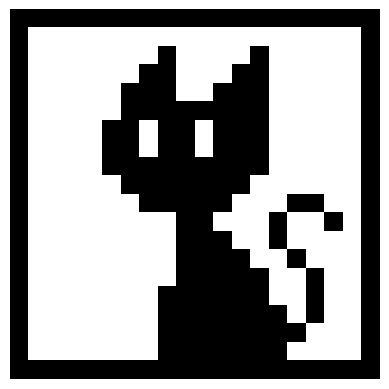

In [23]:
# 作成した回路を1回実行して、結果を取得します。
result_sim = sampler_sim.run([(isa_qc_sim)], shots=1).result()

# 実行結果を個々の測定結果として取得します
memory_sim = result_sim[0].data.c.get_bitstrings()

# 結果を描画します
print(memory_sim)
show_cat(memory_sim)

### 演習 4: 実機を使って実行する
シミュレーターで動きを確認できたので、実機で動かしてみましょう。まず、回路を実行する実機を探します。

In [25]:
# QiskitRuntimeServiceの取得
# APIトークンを設定します
token="YOUR_API_TOKEN"
service = QiskitRuntimeService(channel="ibm_quantum", token=token)

# 最も待ち行列が少ない実機を探します
real_backend = service.least_busy(simulator=False, operational=True)
print(real_backend)

<IBMBackend('ibm_cusco')>


見つけた実機で量子回路を実行します。

In [26]:
# Pass Managerを取得し、トランスパイルします
pm_real = generate_preset_pass_manager(backend=real_backend, optimization_level=1)
isa_qc_real = pm_real.run(circuit)

# 回路を1回実行して、結果を取得します。
sampler_real = Sampler(mode=real_backend)
job_real = sampler_real.run([(isa_qc_real)], shots=1)

job_id_real = job_real.job_id()

実行状況を確認しましょう。

In [29]:
print(f"Job ID: {job_id_real}, Status: {job_real.status()}")

Job ID: cw8721rjzdhg008eatqg, Status: DONE


`Status: DONE` と表示されたら、結果を取得し、猫の状態を決定しましょう。

['0']


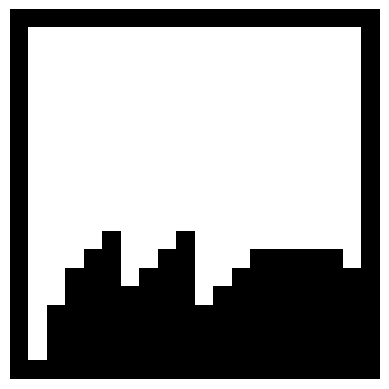

In [30]:
# 実行結果の取得
result_real = job_real.result()

# 実行結果を個々の観測結果として取得
memory_real = result_real[0].data.c.get_bitstrings()

# 結果を描画します
print(memory_real)
show_cat(memory_real)

以上で、量子ビットを使用したシュレディンガーの猫を実装できました！

## 9. まとめ <a id='summary'></a>
いかがでしたか？このガイドではQiskitを用いて以下を行いました：
- 量子回路を作成する
- シミュレーターと実機で量子回路を実行する
- シュレディンガーの猫を実装する

Qiskitをもっと知りたい方には、Qiskit Documentationの[Guides](https://docs.quantum.ibm.com/guides)や、[IBM Quantum Learning](https://learning.quantum.ibm.com/)をお勧めします。

In [31]:
import qiskit
qiskit.__version__

'1.2.4'

<div style="text-align: right;">
(了)
</div>